# Evaluating the GARCH model

In this notebook we evaluate the performance of the GARCH(1,1) model for different stocks. We use stocks with high volatility clustering (DIA, SPY, GS) and low volatility clustering (NVDA, GOOGL, VXX). We look at the following criteria:
<br>
- Distribution of the residuals: For this we perform three statistical tests 
<br>
(1) **Ljung-Box test**: Null Hypothesis (H0): Residuals are uncorrelated. 
<br>
(2) **ARCH test**: Null Hypothesis (H0): No ARCH effects remain. This means the residuals are homoscedastic (have constant variance). 
<br>
(3) **Jarque-Bera test**: Null Hypothesis (H0): Residuals are normally distributed (zero skewness, kurtosis = 3).
<br>

- Error metrics: MAE, MSE, RMSE, QLIKE: These error metrics can be used to compared different model performances. Here we are calculating them for completeness. But later we will compare thes metrics for the simple historical volatility (HV) prediction and compare them with the GARCH(1,1) error metrics.
<br>
- ModeL fit parameters: The GARCH(1,1) nodel parameter include 
<br>
(1) $\mu$
<br>
(2) $\omega$
<br>
(3) $\alpha$
<br> 
(4) $\beta$
<br>
We also look at the AIC and BIC score of the model. The AIC/BIC scores can help in model selection. Here we are just calculating them for future reference
<br>
- Visual inspection of realized volatility and predicted volatility 
<br>

In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data import stock_data
from wfwGARCH import clusteringTest, GARCHWalkForward
from hvPred import HVmodel

In [4]:
con = sqlite3.connect("stock_data.db", check_same_thread=False)

In [5]:
df_stocks=pd.read_csv("results/clustering_scores.csv")

In [6]:
df_stocks.head(10)

,Ticker,Sector,#Observations,Clustering Score
0,DIA,ETF,6465,1.615
1,SPY,ETF,6458,1.528
2,TLT,ETF,5780,1.507
3,XLF,ETF,6465,1.290
4,ARKK,ETF,2691,1.269
5,XLK,ETF,6465,1.219
6,GS,Finance,6463,1.069
7,BG,commodity,6023,0.815
8,NEM,commodity,6465,0.717
9,JPM,Finance,6463,0.697


In [7]:
df_stocks.tail(10)

,Ticker,Sector,#Observations,Clustering Score
37,IWM,ETF,6321,0.014
38,C,Finance,6463,0.008
39,DXCM,Health Tech,5095,0.004
40,NVDA,Technology,6463,0.002
41,EEM,ETF,5600,0.002
42,AAPL,Technology,6463,-0.000
43,AVGO,Technology,4008,-0.000
44,CRM,Technology,5298,-0.000
45,GOOGL,Technology,5258,-0.001
46,VXX,ETF,4140,-0.008


In [8]:
high_clustering_stocks = list(df_stocks['Ticker'].head(3))
high_clustering_stocks

['DIA', 'SPY', 'TLT']

In [9]:
low_clustering_stocks = list(df_stocks['Ticker'].tail(3))
low_clustering_stocks

['CRM', 'GOOGL', 'VXX']

# High clustering stocks

## DIA

In [10]:
sd = stock_data("DIA")
DIA_df = sd.load_data(con)
DIA_df.head()

,open,high,low,close,volume,returns
date,,,,,,
1999-11-02,107.0,107.7,105.7,105.7,975300.0,-0.754009
1999-11-03,106.8,106.8,105.8,106.2,1025500.0,0.471922
1999-11-04,107.0,107.4,106.1,106.6,578600.0,0.375940
1999-11-05,108.0,108.3,106.9,107.5,1139100.0,0.840734
1999-11-08,106.4,107.6,106.4,107.4,628600.0,-0.093067


In [11]:
DIA_GARCH = GARCHWalkForward(DIA_df)
DIA_GARCH.fit_garch()

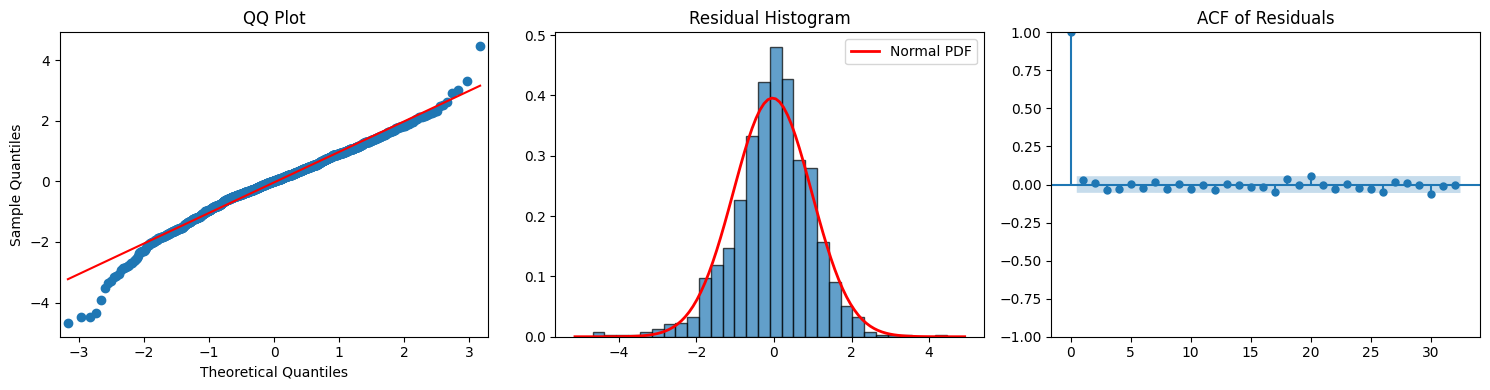

{'ljung_box_pvalue': np.float64(0.723),
 'arch_test_pvalue': np.float64(0.205),
 'jarque_bera_pvalue': np.float64(0.0)}

In [12]:
DIA_GARCH.residual_diagnostics()

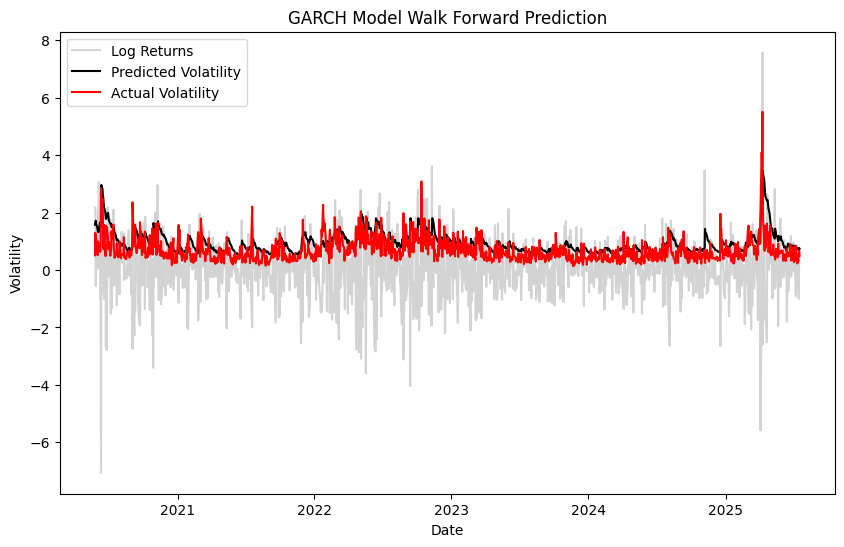

In [13]:
DIA_GARCH.plot_results()

In [14]:
DIA_GARCH.compute_error_metrics()
DIA_GARCH.error_metrics

{'MAE': 0.365,
 'MSE': 0.215,
 'RMSE': np.float64(0.463),
 'QLIKE': np.float64(0.447)}

In [16]:
DIA_GARCH.fit_params[0]

{'mu': 0.0638865664499323,
 'omega': 0.022051289746171585,
 'alpha[1]': 0.13283585191273065,
 'beta[1]': 0.851430460015245,
 'aic': 13717.357308618593,
 'bic': np.float64(13743.56136757816)}

## SPY

In [17]:
sd = stock_data("SPY")
SPY_df = sd.load_data(con)

In [18]:
SPY_GARCH = GARCHWalkForward(SPY_df)
SPY_GARCH.fit_garch()

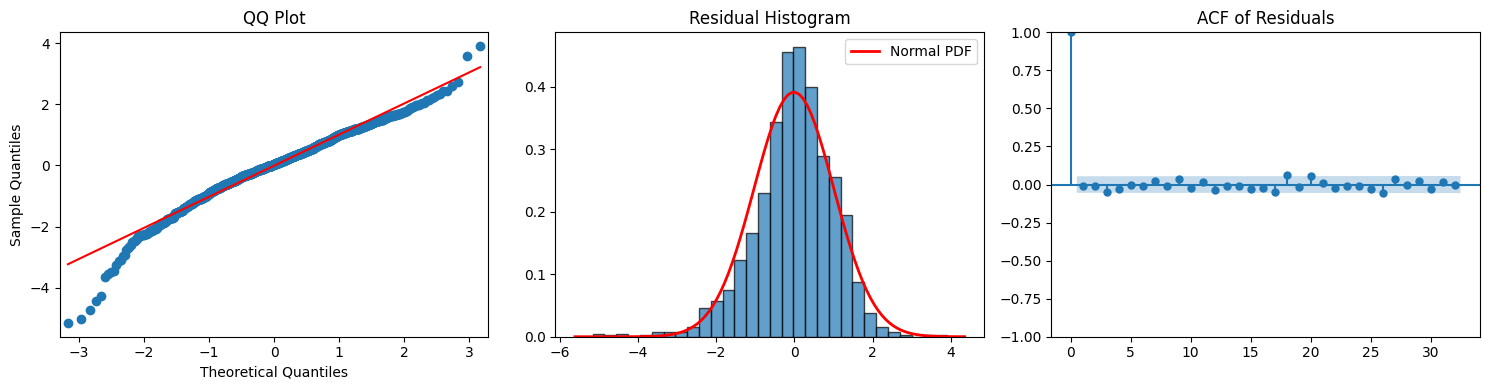

{'ljung_box_pvalue': np.float64(0.651),
 'arch_test_pvalue': np.float64(0.243),
 'jarque_bera_pvalue': np.float64(0.0)}

In [19]:
SPY_GARCH.residual_diagnostics()

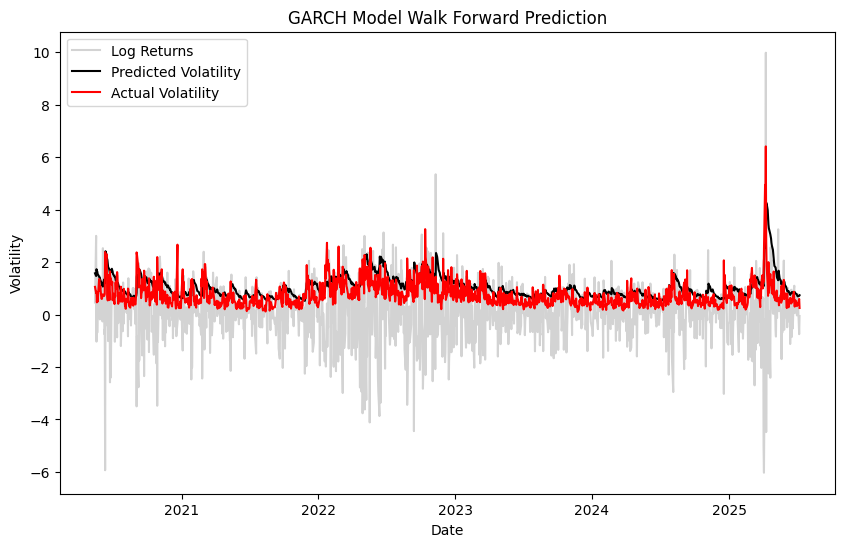

In [20]:
SPY_GARCH.plot_results()

In [21]:
SPY_GARCH.compute_error_metrics()

{'MAE': 0.417,
 'MSE': 0.285,
 'RMSE': np.float64(0.534),
 'QLIKE': np.float64(0.624)}

In [22]:
SPY_GARCH.fit_params[0]

{'mu': 0.06085901283942761,
 'omega': 0.023775745207434487,
 'alpha[1]': 0.1281357120725301,
 'beta[1]': 0.8559342756598184,
 'aic': 14206.952665958506,
 'bic': np.float64(14233.15208185313)}

## GS

In [23]:
sd = stock_data("GS")
GS_df = sd.load_data(con)

In [24]:
GS_GARCH = GARCHWalkForward(GS_df)
GS_GARCH.fit_garch()

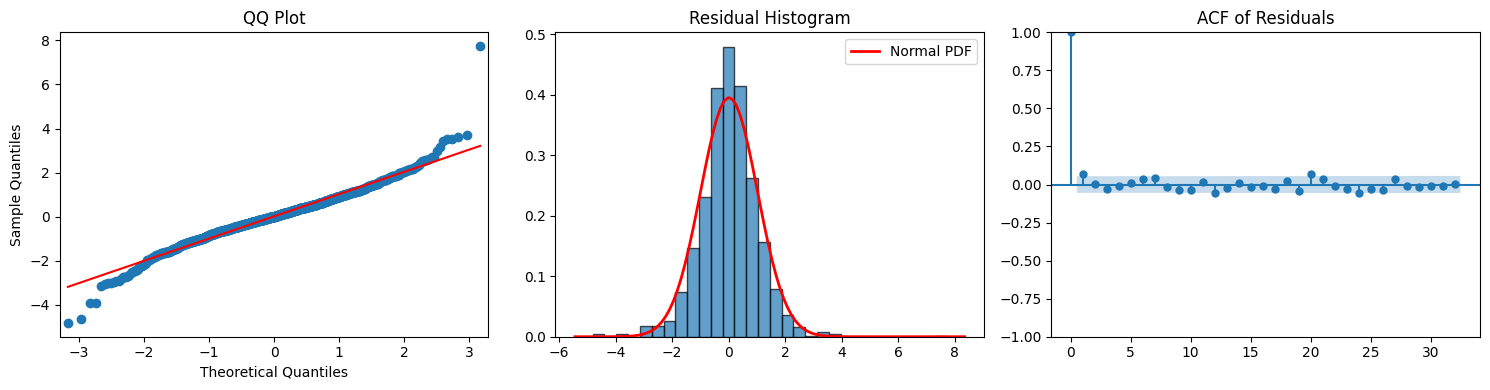

{'ljung_box_pvalue': np.float64(0.097),
 'arch_test_pvalue': np.float64(0.575),
 'jarque_bera_pvalue': np.float64(0.0)}

In [25]:
GS_GARCH.residual_diagnostics()

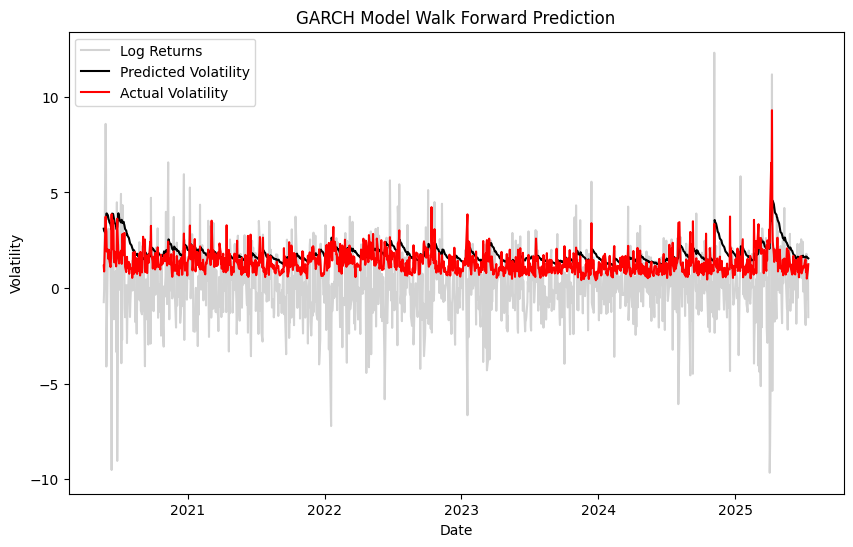

In [26]:
GS_GARCH.plot_results()

In [27]:
GS_GARCH.fit_params[0]

{'mu': 0.05435588297026197,
 'omega': 0.04125773381015051,
 'alpha[1]': 0.07195925553307339,
 'beta[1]': 0.9199820135677893,
 'aic': 21059.115719644702,
 'bic': np.float64(21085.318231514713)}

# Low clustering stocks

## NVDA

In [28]:
sd = stock_data("NVDA")
NVDA_df = sd.load_data(con)

In [29]:
NVDA_GARCH = GARCHWalkForward(NVDA_df)
NVDA_GARCH.fit_garch()

/Users/susmitasingh/Documents/GitHub/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/GitHub/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/GitHub/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/GitHub/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: Conv

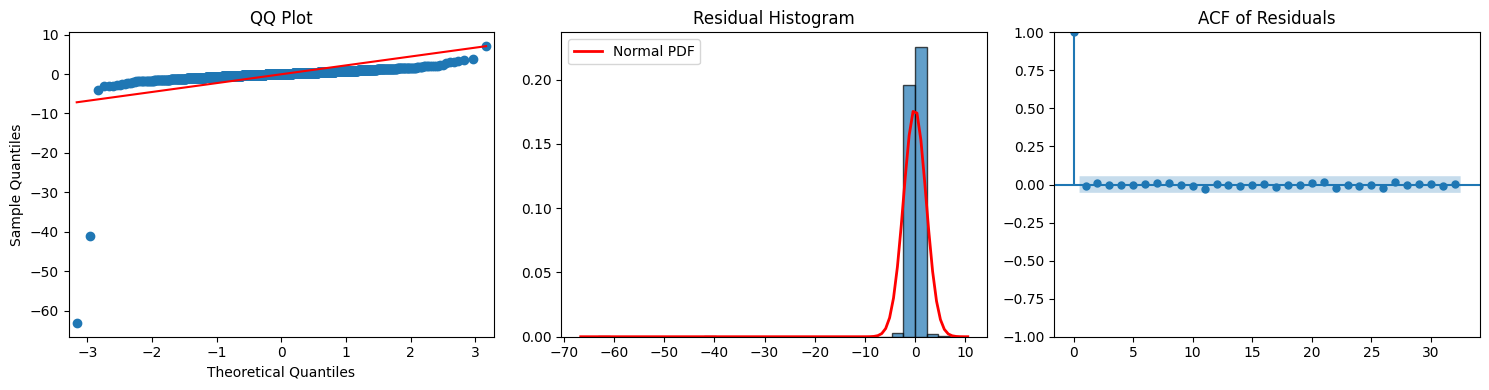

{'ljung_box_pvalue': np.float64(1.0),
 'arch_test_pvalue': np.float64(1.0),
 'jarque_bera_pvalue': np.float64(0.0)}

In [30]:
NVDA_GARCH.residual_diagnostics()

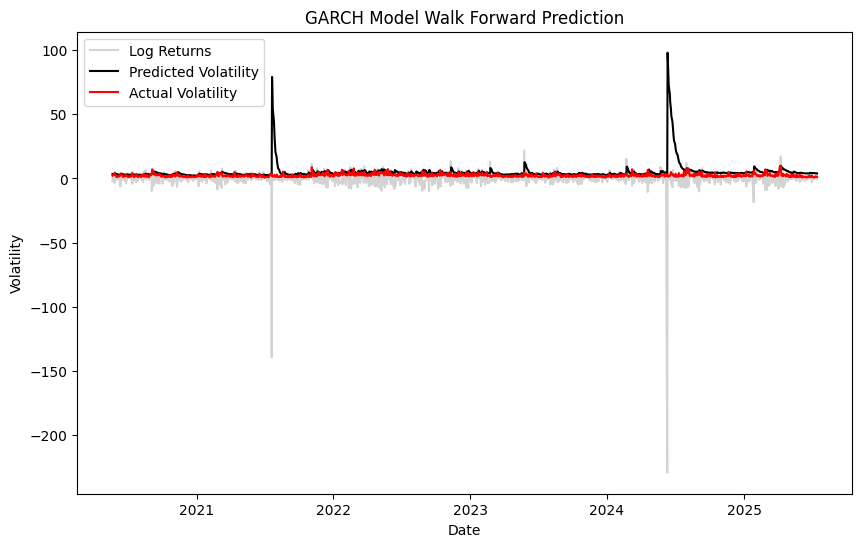

In [31]:
NVDA_GARCH.plot_results()

In [33]:
NVDA_GARCH.compute_error_metrics()

{'MAE': 2.826,
 'MSE': 55.989,
 'RMSE': np.float64(7.483),
 'QLIKE': np.float64(3.265)}

In [34]:
NVDA_GARCH.fit_params[0]

{'mu': 0.09173895167264827,
 'omega': 0.4984939290320507,
 'alpha[1]': 0.14249434431677568,
 'beta[1]': 0.857505655431986,
 'aic': 28308.751649136335,
 'bic': np.float64(28334.954161006346)}

## GOOGL

In [35]:
sd = stock_data("GOOGL")
GOOGL_df = sd.load_data(con)

In [36]:
GOOGL_GARCH = GARCHWalkForward(GOOGL_df)
GOOGL_GARCH.fit_garch()

/Users/susmitasingh/Documents/GitHub/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/GitHub/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/GitHub/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/GitHub/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: Conv

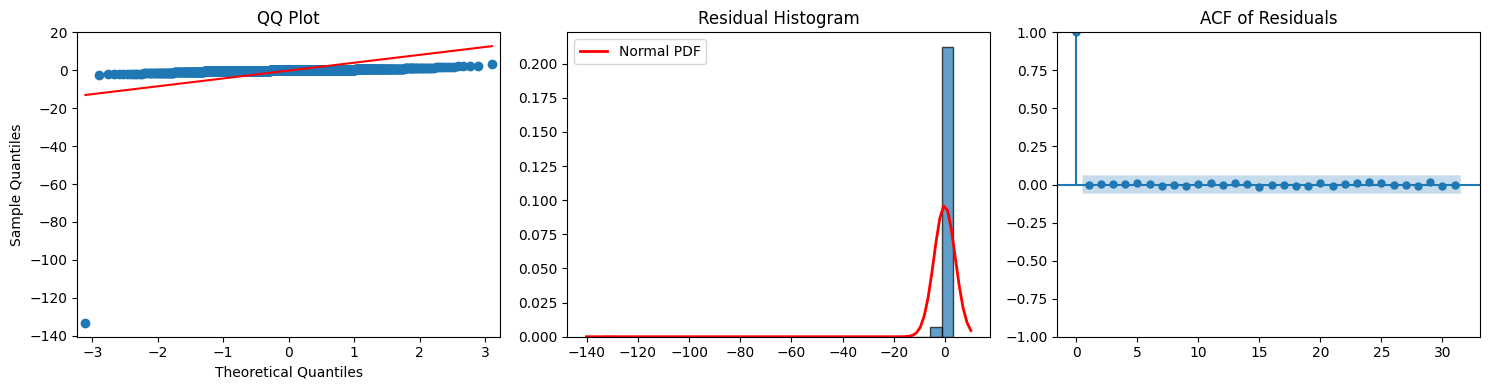

{'ljung_box_pvalue': np.float64(1.0),
 'arch_test_pvalue': np.float64(1.0),
 'jarque_bera_pvalue': np.float64(0.0)}

In [37]:
GOOGL_GARCH.residual_diagnostics()

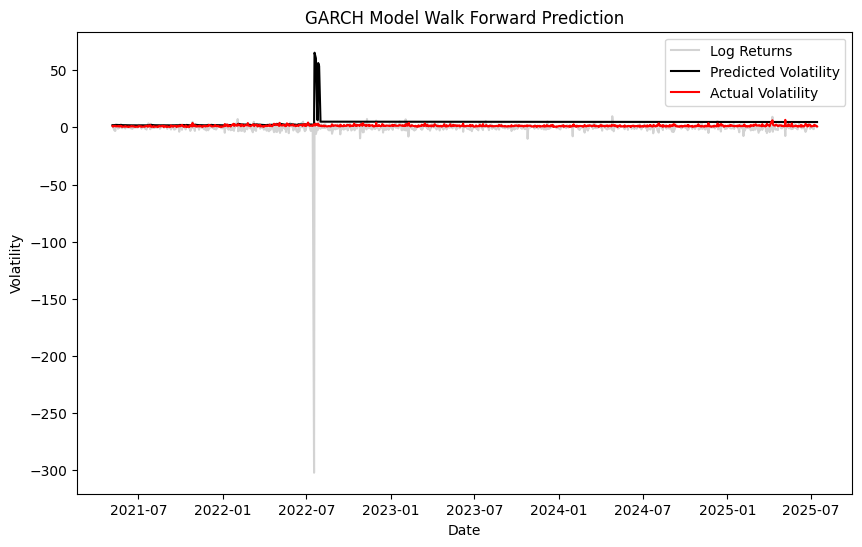

In [38]:
GOOGL_GARCH.plot_results()

In [39]:
GOOGL_GARCH.compute_error_metrics()

{'MAE': 3.087,
 'MSE': 30.945,
 'RMSE': np.float64(5.563),
 'QLIKE': np.float64(2.913)}

In [40]:
GOOGL_GARCH.fit_params[0]

{'mu': 0.13702144546694742,
 'omega': 0.5576440579657024,
 'alpha[1]': 0.10138346208893079,
 'beta[1]': 0.806760836507622,
 'aic': 18243.38238281654,
 'bic': np.float64(18268.75945224159)}

## VXX

In [41]:
sd = stock_data("VXX")
VXX_df = sd.load_data(con)

In [42]:
VXX_GARCH = GARCHWalkForward(VXX_df)
VXX_GARCH.fit_garch()

/Users/susmitasingh/Documents/GitHub/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/susmitasingh/Documents/GitHub/stock_project/.venv/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


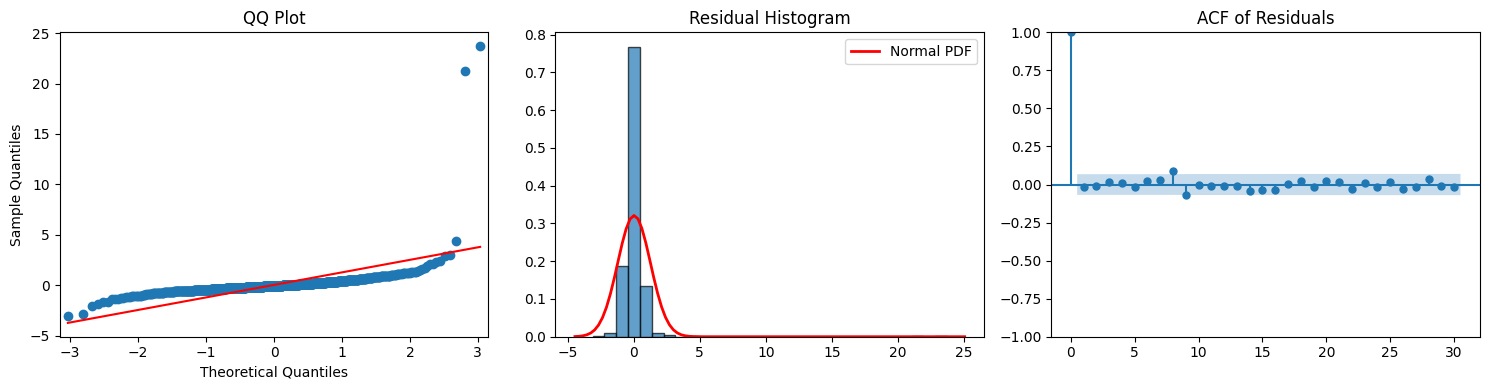

{'ljung_box_pvalue': np.float64(0.269),
 'arch_test_pvalue': np.float64(1.0),
 'jarque_bera_pvalue': np.float64(0.0)}

In [43]:
VXX_GARCH.residual_diagnostics()

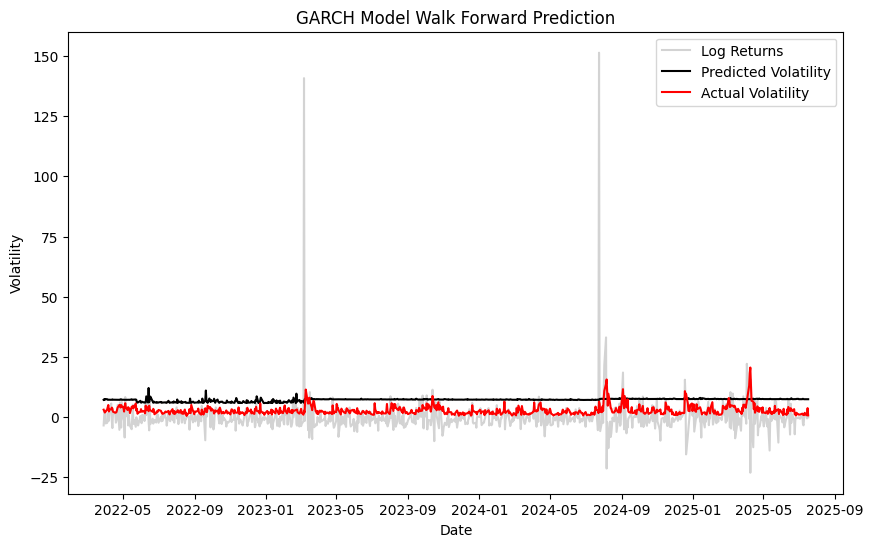

In [44]:
VXX_GARCH.plot_results()

In [45]:
VXX_GARCH.compute_error_metrics()

{'MAE': 4.578,
 'MSE': 23.066,
 'RMSE': np.float64(4.803),
 'QLIKE': np.float64(4.141)}

In [46]:
VXX_GARCH.fit_params[0]

{'mu': -0.043233823455694466,
 'omega': 8.84413823263656,
 'alpha[1]': 4.3508420181476314e-05,
 'beta[1]': 0.8284957184877879,
 'aic': 22460.583250462263,
 'bic': np.float64(22485.004480524283)}